Cross Validation Scores:  [0.95793236 0.99175144 0.99010173 0.98405279 0.90349189]
Average CV Score:  0.9654660434423976


              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1653
           1       0.96      1.00      0.98      1984

    accuracy                           0.97      3637
   macro avg       0.98      0.97      0.97      3637
weighted avg       0.98      0.97      0.97      3637



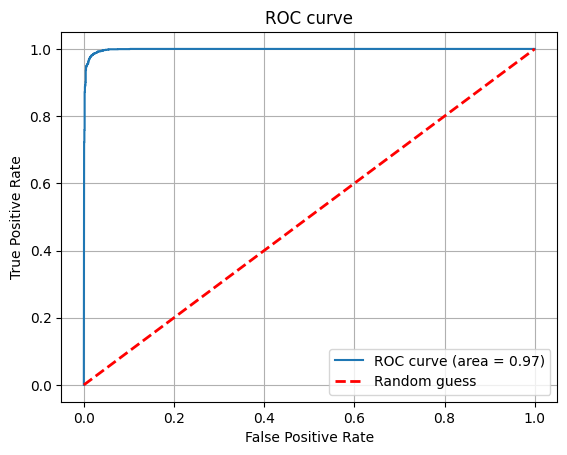

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, KFold  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %score)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

dataset = pd.read_csv("https://raw.githubusercontent.com/phattarin-kitbumrung/machinelearning-python/dataset/main/rice.csv")

# train & test set
x = dataset.drop(['id', 'Class'], axis=1)
y = dataset['Class']
# dividing dataset in to train test 80% - 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# training
model = GaussianNB()
cross_validation_score = cross_val_score(model, x, y, cv = KFold(n_splits = 5))
print("Cross Validation Scores: ", cross_validation_score)
print("Average CV Score: ", cross_validation_score.mean())
print("\n")
model.fit(x_train,y_train)

# test
y_pred = model.predict(x_test)

# result
y_pred_proba = model.predict_proba(x_test)
score = model.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred_proba[:, 1])
